In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

# Linear Regression

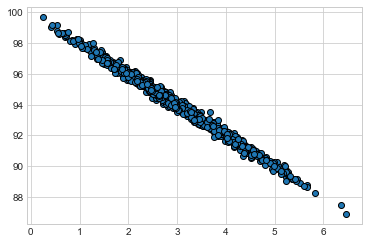

In [3]:
page_speeds = np.random.normal(3.0, 1.0, 1000)
purchases_amount = 100 - (page_speeds + np.random.normal(0, 0.1, 1000)) * 2

plt.scatter(page_speeds, purchases_amount, edgecolor="k");

In [4]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(page_speeds, purchases_amount)

In [5]:
r_value ** 2

0.9902887063370893

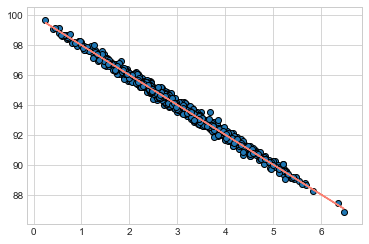

In [7]:
def predict(x, slope, intercept):
    return intercept + slope * x

fitline = predict(page_speeds, slope, intercept)

plt.plot(page_speeds, fitline, color="salmon")
plt.scatter(page_speeds, purchases_amount, edgecolor="k");

# Polynomial Regression

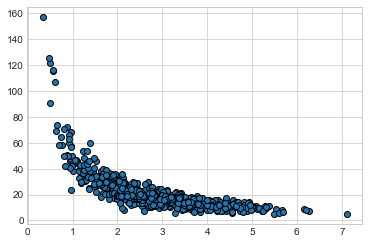

In [8]:
np.random.seed(2)
page_speeds = np.random.normal(3.0, 1.0, 1000)
purchases_amount = np.random.normal(50.0, 10.0, 1000) / page_speeds

plt.scatter(page_speeds, purchases_amount, edgecolor="k");

In [22]:
X = np.array(page_speeds)
y = np.array(purchases_amount)

p4 = np.poly1d(np.polyfit(X, y, 4))

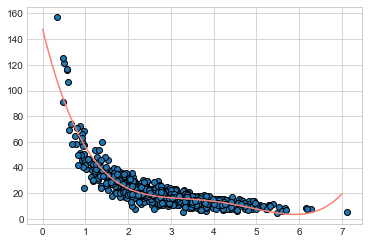

In [23]:
xp = np.linspace(0, 7, 100)
plt.scatter(X, y, edgecolor="k")
plt.plot(xp, p4(xp), color="salmon");

In [24]:
from sklearn.metrics import r2_score

r2_score(y, p4(X))

0.8293766396303073

# Multiple Regression

In [28]:
import pandas as pd

df = pd.read_excel("http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls")
df1 = df[["Mileage", "Price"]]
df1.head()

,Mileage,Price
0,8221,17314.103129
1,9135,17542.036083
2,13196,16218.847862
3,16342,16336.913140
4,19832,16339.170324


In [31]:
bins = np.arange(0, 50000, 10000)
groups = df1.groupby(pd.cut(df1["Mileage"], bins)).mean()
groups.head()

,Mileage,Price
Mileage,,
"(0, 10000]",5588.629630,24096.714451
"(10000, 20000]",15898.496183,21955.979607
"(20000, 30000]",24114.407104,20278.606252
"(30000, 40000]",33610.338710,19463.670267


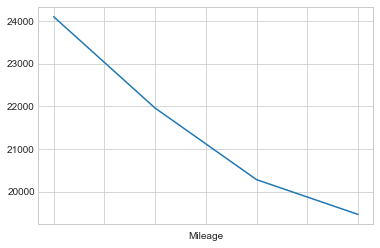

In [33]:
groups["Price"].plot.line();

In [36]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df[["Mileage", "Cylinder", "Doors"]].copy()
y = df["Price"].copy()

X[["Mileage", "Cylinder", "Doors"]] = scaler.fit_transform(X)
est = sm.OLS(endog=y, exog=X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                    2.23e-11
Time:                        20:52:38   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""